In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv('tickets.csv')


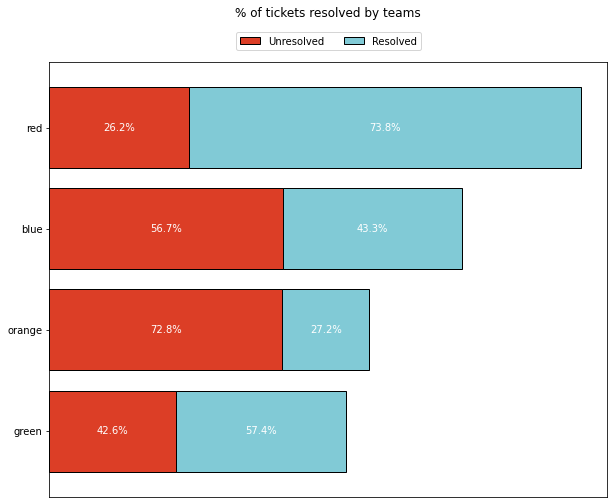

In [4]:

result = df.groupby(['user_team', 'customer_problem_resolved']).size().reset_index(name='count')

pivot_result = result.pivot(index='user_team', columns='customer_problem_resolved', values='count').reset_index()
pivot_result.columns.name = None
pivot_result.columns = ['user_team', 'False', 'True']
result_dict = pivot_result.to_dict(orient='list')

df_new = pd.DataFrame(result_dict)
df_new.set_index('user_team', inplace=True)
df_new['Total'] = df_new['False']+df_new['True']
# Sort by the "True" column in descending order
df_new.sort_values(by='Total', ascending=True, inplace=True)
df_new.drop(columns='Total', inplace=True)

fig, ax = plt.subplots(figsize=(10, 8))
df_new.plot(kind='barh', stacked=True, color=['#dc3e26', '#81cad6'], width=0.8, ax=ax, edgecolor='black')

ax.set_ylabel('')
ax.legend(labels=['Unresolved', 'Resolved'], bbox_to_anchor=(0.5, 1.08), loc='upper center',ncol=2)

ax.set_title('% of tickets resolved by teams',y=1.09)

for team in df_new.index:
    total = df_new.loc[team].sum()
    false_percent = df_new.loc[team, 'False'] / total
    true_percent = df_new.loc[team, 'True'] / total

    # Finding x coordinate centers
    false_center = df_new.loc[team, 'False'] / 2
    true_center = df_new.loc[team, 'False'] + df_new.loc[team, 'True'] / 2

    ax.annotate(f'{false_percent:.1%}',
                (false_center, list(df_new.index).index(team)),
                ha='center', va='center', color='white', fontsize=10)
    ax.annotate(f'{true_percent:.1%}',
                (true_center, list(df_new.index).index(team)),
                ha='center', va='center', color='w', fontsize=10)

plt.xticks([])
plt.savefig('plt2.pdf')
plt.show()


Team red received the highest number of tickets,and were able to solve more than 70% of those tickets. 
The average time taken to resolve those tickets is also the lowest

### Plot 3

In [3]:
average_durations_per_user = df.groupby(['user_team', 'user_actioned']).agg({
    'creation_to_view_duration_hours': 'mean',
    'creation_to_action_duration_hours': 'mean',
    'action_to_view_duration_hours':'mean'
}).reset_index()
average_durations_per_user.columns

Index(['user_team', 'user_actioned', 'creation_to_view_duration_hours',
       'creation_to_action_duration_hours', 'action_to_view_duration_hours'],
      dtype='object')

In [46]:
average_durations_per_user_team = df.groupby(['user_team']).agg({
    'creation_to_view_duration_hours': 'mean',
    'creation_to_action_duration_hours': 'mean',
    'action_to_view_duration_hours':'mean'
}).reset_index()
average_durations_per_user.columns

Index(['user_team', 'user_actioned', 'creation_to_view_duration_hours',
       'creation_to_action_duration_hours', 'action_to_view_duration_hours'],
      dtype='object')

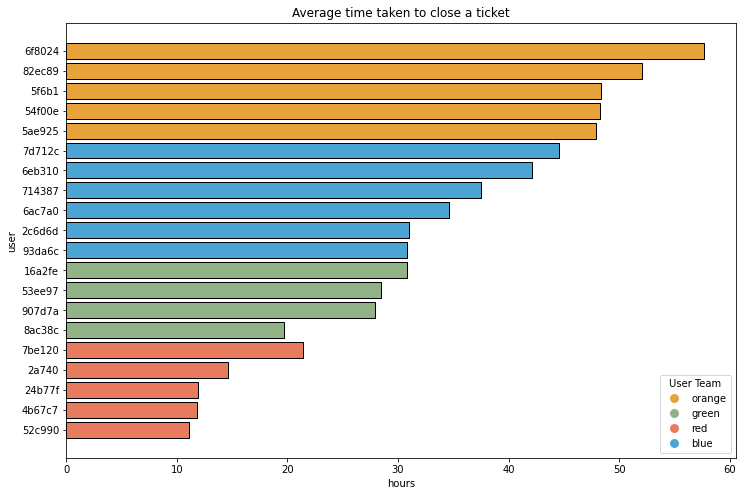

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

color_mapping = {'orange': '#e7a339', 'green': '#91B187', 'red': '#e87a5d', 'blue': '#4aa5d5'}
average_durations_per_user = average_durations_per_user.sort_values(by=['user_team', 'creation_to_action_duration_hours'])


average_positions = average_durations_per_user.groupby('user_team')['creation_to_action_duration_hours'].mean().sort_values(ascending=True)

# Plotting the horizontal bar graph with custom colors and spacing
plt.figure(figsize=(12, 8))
x = np.arange(len(average_durations_per_user['user_actioned']))

for i, team in enumerate(average_positions.index):
    team_data = average_durations_per_user[average_durations_per_user['user_team'] == team]
    plt.barh(team_data['user_actioned'], team_data['creation_to_action_duration_hours'],
             color=color_mapping[team], label=team, edgecolor='black', align='center')

# Adding labels and title
plt.xlabel('hours')
plt.ylabel('user')
plt.title('Average time taken to close a ticket')

# Adding legend with custom colors
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=key, markerfacecolor=color_mapping[key], markersize=10) for key in color_mapping]
plt.legend(handles=legend_labels, title='User Team', loc='lower right')

# Display the plot
plt.show()


In [59]:
average_durations_per_user = average_durations_per_user.sort_values(by=['user_team', 'creation_to_action_duration_hours'])

average_durations_per_user

,user_team,user_actioned,creation_to_view_duration_hours,creation_to_action_duration_hours,action_to_view_duration_hours
5,blue,93da6c,30.290440,30.818904,30.818904
0,blue,2c6d6d,30.523314,31.036329,31.036329
1,blue,6ac7a0,34.022969,34.575650,34.575650
3,blue,714387,36.931089,37.498315,37.498315
2,blue,6eb310,41.594647,42.155718,42.155718
4,blue,7d712c,44.005361,44.587900,44.587900
8,green,8ac38c,19.191656,19.664098,19.664098
9,green,907d7a,27.378315,27.897205,27.897205
7,green,53ee97,27.945034,28.447193,28.447193
6,green,16a2fe,30.312052,30.838958,30.838958


In [64]:
x = np.arange(len(average_durations_per_user['user_actioned']))
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [71]:
average_durations_per_user = average_durations_per_user.sort_values(by=['user_team', 'creation_to_action_duration_hours'])
average_durations_per_user[['user_auctioned','creation_to_view_duration_hours']]

,user_team,user_actioned,creation_to_view_duration_hours,creation_to_action_duration_hours,action_to_view_duration_hours
5,blue,93da6c,30.290440,30.818904,30.818904
0,blue,2c6d6d,30.523314,31.036329,31.036329
1,blue,6ac7a0,34.022969,34.575650,34.575650
3,blue,714387,36.931089,37.498315,37.498315
2,blue,6eb310,41.594647,42.155718,42.155718
4,blue,7d712c,44.005361,44.587900,44.587900
8,green,8ac38c,19.191656,19.664098,19.664098
9,green,907d7a,27.378315,27.897205,27.897205
7,green,53ee97,27.945034,28.447193,28.447193
6,green,16a2fe,30.312052,30.838958,30.838958


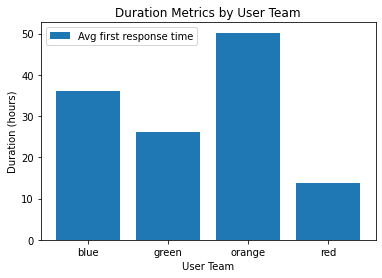

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the grouped bars
plt.bar(average_durations_per_user_team['user_team'], average_durations_per_user_team['creation_to_view_duration_hours'],label='Avg first response time')

# Adding labels and title
plt.xlabel('User Team')
plt.ylabel('Duration (hours)')
plt.title('Duration Metrics by User Team')
# plt.xticks(x, user_teams)
plt.legend()

# Display the plot
plt.show()


In [48]:
average_durations_per_user_team

,user_team,creation_to_view_duration_hours,creation_to_action_duration_hours,action_to_view_duration_hours
0,blue,36.050510,36.600443,36.600443
1,green,26.054781,26.559072,26.559072
2,orange,50.203605,50.802142,50.802142
3,red,13.653114,14.005210,14.005210
